# Tarea 5: Jugando con MNIST desde NumPy

## Introducción a MNIST y carga desde Keras

[MNIST](https://es.wikipedia.org/wiki/Base_de_datos_MNIST) es una base de datos clásica en el mundo del aprendizaje automático. Es una base de datos de dígitos escritos a mano que se utiliza para entrenar sistemas de reconocimiento de dígitos. La base de datos contiene 60,000 imágenes de entrenamiento y 10,000 imágenes de test.

Vamos a descargar esta base de datos desde Keras y a visualizar algunas de las imágenes.

Hay que tener en cuenta que, cuando queremos trabajar con imágenes, antes de nada tenemos que comprender en qué formato están almacenadas, y probablemente hacer un procesado de estas imágenes. En este caso, el *dataset* se nos presenta ya preprocesado, con las imágenes normalizadas en 28x28 píxeles y en escala de grises.

Cada píxel tiene un valor que representa la intensidad en escala de grises, entre 0 (blanco) y 255 (negro).

In [1]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Keras nos devuelve una tupla con los datos de entrenamiento y los datos de test. Cada uno de estos conjuntos de datos es a su vez una tupla con las imágenes y las etiquetas asociadas a cada imagen. Podemos mostrar por ejemplo que `X_train` es un array de NumPy de 60,000 imágenes de 28x28 píxeles. Se trata por tanto de 3 dimensiones: 60,000 x 28 x 28.

In [2]:
print(type(X_train))
print(X_train.dtype) # uint8 (0-255)
print(X_train.shape) # (60000, 28, 28): 60000 images, 28x28 pixels

<class 'numpy.ndarray'>
uint8
(60000, 28, 28)


Por su parte, podemos ver que `y_train` es un vector que contiene las etiquetas asociadas a cada imagen.

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Vamos a mostrar la primera de las imágenes (`X_train[0]`) escribiendo el valor de cada elemento del array en una cuadrícula:

In [4]:
def print_image_data_as_pixel_values(image):
    for i in range(28):
        for j in range(28):
            print(f"{image[i][j]:3}", end="")
        print()
        
print_image_data_as_pixel_values(X_train[0])

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

y de un modo más elegante, utilizando **matplotlib**:

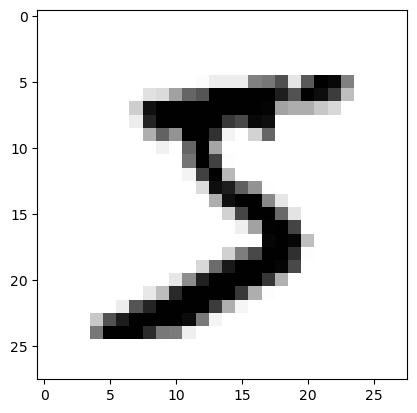

In [5]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.show()
    
plot_image(X_train[0])

y su etiqueta correspondiente (`y_train[0]`):

In [6]:
y_train[0]

5

Viendo una cuadrícula con las primeras 100 imágenes:

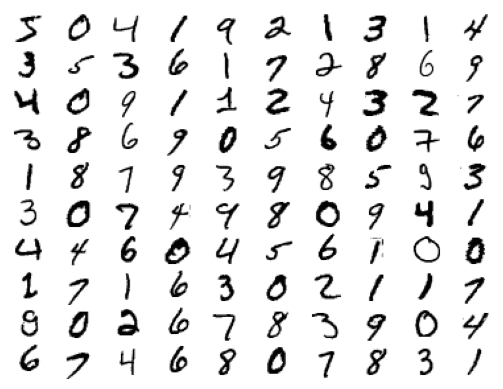

In [7]:
def print_matrix_first_100(data):
    for idx, image_data in enumerate(data[:100]):
        plt.subplot(10, 10, idx + 1)
        plt.imshow(image_data, cmap="binary")
        plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

print_matrix_first_100(X_train)

## Ejercicios

Resuelve los siguientes ejercicios cada uno en su celda. Haz uso solo de la librería NumPy.

### Básicos

1. Crea una variable `matrix_first_100_labels` con las primeras 100 etiquetas en una matriz de 10x10 y muéstralas para cotejarlas con el anterior gráfico de sus correspondientes imágenes. 

In [8]:
matrix_first_100_labels = y_train[:100].reshape(10, 10)
print(matrix_first_100_labels)

[[5 0 4 1 9 2 1 3 1 4]
 [3 5 3 6 1 7 2 8 6 9]
 [4 0 9 1 1 2 4 3 2 7]
 [3 8 6 9 0 5 6 0 7 6]
 [1 8 7 9 3 9 8 5 9 3]
 [3 0 7 4 9 8 0 9 4 1]
 [4 4 6 0 4 5 6 1 0 0]
 [1 7 1 6 3 0 2 1 1 7]
 [9 0 2 6 7 8 3 9 0 4]
 [6 7 4 6 8 0 7 8 3 1]]


2. Algunos modelos de *machine learning* requieren que los datos de entrada estén aplanados. En este caso eso significa que cada imagen esté en una única dimensión, o lo que es lo mismo, que cada imagen de 28x28 píxeles esté representada por un vector de 784 píxeles. Aplana las imágenes de entrenamiento y de test, devolviendo dos arrays de NumPy con las dimensiones 60,000 x 784 y 10,000 x 784 respectivamente que se llamen `X_train_flat` y `X_test_flat`.

In [9]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

3. Modifica la función `plot_image` con la que hemos visualizado la primera imagen (`X_train[0]`) para que funcione también recibiendo imágenes aplanadas (la misma función debe poder recibir imágenes de 28*28 o de 784). Comprueba que funciona correctamente mostrando (`X_train_flat[0]`).

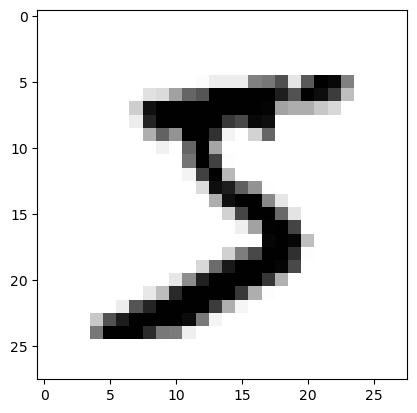

In [10]:
# Simplemente convirtiendo a 28x28
def plot_image(image):
    if image.ndim == 1:
        image = image.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.show()
    
plot_image(X_train_flat[0])

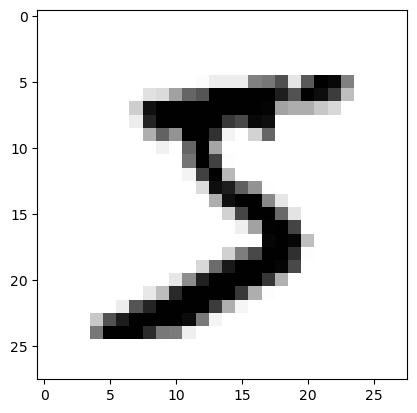

In [11]:
import numpy as np

def reshape_if_flattened(image): # asume que es cuadrada
    if image.ndim == 1:  # If flattened
        side = int(np.sqrt(image.shape[0]))
        return image.reshape(side, side)
    return image  # Return unchanged if already 2D
def plot_image(image):
    image = reshape_if_flattened(image)
    plt.imshow(image, cmap="binary")
    plt.show()

plot_image(X_train_flat[0])

4. Comprueba que, para todas las imágenes de entrenamiento, el pixel que está en la esquina inferior derecha está siempre a cero.

In [12]:
import numpy as np
assert np.all(X_train[:,-1,-1] == 0)

### One-hot encoding

5. Algunos modelos de *machine learning* requieren que las etiquetas sean codificadas en un formato *one-hot*. Esto significa que si tenemos 10 clases posibles, cada etiqueta se convierte en un vector de 10 elementos, con un 1 en la posición de la clase y 0 en el resto de posiciones. En este caso, como tenemos 10 dígitos posibles, necesitamos un vector de 10 elementos para cada etiqueta. O sea, si una imagen es un 3, la etiqueta será `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`, y si es un 9, la etiqueta será `[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]`.

Codifica las etiquetas de entrenamiento y de test en formato *one-hot*, devolviendo dos arrays de NumPy con las dimensiones 60,000 x 10 y 10,000 x 10 respectivamente que se llamen `y_train_onehot` y `y_test_onehot`.

In [13]:
y_train_onehot = np.zeros((y_train.shape[0], y_train.max() + 1))
y_train_onehot[range(y_train.shape[0]), y_train] = 1

# Otra forma
y_test_onehot = np.eye(10)[y_test] # para cada valor de y_test, se selecciona la fila correspondiente en la matriz identidad

### Normalización

6. Muestra los siguientes valores:
    - Valor mínimo y máximo de los píxeles de las imágenes de entrenamiento.
    - Media y desviación típica (*standard deviation*) de los píxeles de las imágenes de entrenamiento.

In [14]:
print(f"Min Pixel Value: {X_train.min()}")
print(f"Max Pixel Value: {X_train.max()}")
print(f"Mean Pixel Value {X_train.mean()}")
print(f"Std Deviation of Pixel Values: {X_train.std()}")

Min Pixel Value: 0
Max Pixel Value: 255
Mean Pixel Value 33.318421449829934
Std Deviation of Pixel Values: 78.56748998339798


7. Normaliza las imágenes de entrenamiento de forma que los valores de los píxeles estén en el rango [0, 1]. Devuelve un array `X_train_norm` y muestra la primera imagen normalizada.

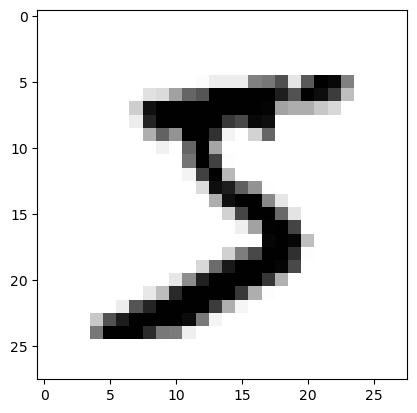

Min Pixel Value: 0.0
Max Pixel Value: 1.0


In [15]:
X_train_norm0 = (X_train - X_train.min()) / (X_train.max() - X_train.min())

X_train_norm1 = X_train / 255.0
X_train_norm = X_train.astype(np.float32) / 255.0 # forma normalmente recomendada ser más eficiente

assert np.allclose(X_train_norm, X_train_norm0), "X_train_norm does not match X_train_norm0"
assert np.allclose(X_train_norm, X_train_norm1), "X_train_norm does not match X_train_norm1"

plot_image(X_train_norm[0])

print(f"Min Pixel Value: {X_train_norm.min()}")
print(f"Max Pixel Value: {X_train_norm.max()}")

8. Crea las variables `pixel_norm_mean` y `pixel_norm_std` que contengan la media y la desviación típica de los píxeles de las imágenes normalizadas de **entrenamiento**. Muestra estos valores. Es posible que te los encuentres en el futuro.

In [16]:
pixel_norm_mean = X_train_norm.mean()
pixel_norm_std = X_train_norm.std()

assert np.isclose(pixel_norm_mean, 0.130660)
assert np.isclose(pixel_norm_std, 0.308107)

9. Estandariza las imágenes de entrenamiento y de test, de forma que tengan media 0 y desviación típica 1. Devuelve `X_train_standardized`.

> La **estandarización Z-score** (***standard score***) se calcula primero restando la media (para que ésta sea 0), y luego dividiendo por la **desviación típica** para que la distribución resultante tenga desviación típica 1:
>
> $$ X_{std} = \frac{X - \mu}{\sigma} $$
> 
> donde $X$ es el array de entrada, $X_{std}$ es el array estandarizado, $\mu$ es la media y $\sigma$ es la desviación estándar.

In [17]:
X_train_standardized_0 = (X_train - X_train.mean()) / X_train.std()

X_train_standardized = (X_train - np.mean(X_train, keepdims=True)) / (np.std(X_train, keepdims=True) + 1e-8)
# añadimos 1e-8 (valor muy pequeño) para evitar la división por cero
# keepdims=True para mantener las dimensiones de la matriz 

print(X_train.mean())
print(np.mean(X_train, keepdims=True))

assert np.isclose(X_train_standardized.mean(), 0)
assert np.isclose(X_train_standardized.std(), 1)

assert np.allclose(X_train_standardized, X_train_standardized_0)

33.318421449829934
[[[33.31842145]]]


10. Aplica el proceso de estandarización a `X_train_norm`. Devuelve `X_train_norm_standardized` y comprueba que todos sus valores son iguales que los de `X_train_standardized` (puedes usar `np.allclose()` ya que no serán exactamente iguales por la precisión de los cálculos en coma flotante).

In [18]:
X_train_norm1 = X_train / 255.0
X_train_norm = X_train.astype(np.float32) / 255.0 

X_train_standardized_0 = (X_train - X_train.mean()) / X_train.std()
X_train_standardized = (X_train - np.mean(X_train, keepdims=True)) / (np.std(X_train, keepdims=True) + 1e-8)

X_train_norm_standarized = (X_train_norm - np.mean(X_train_norm, keepdims=True)) / (np.std(X_train_norm, keepdims=True) + 1e-8)
X_train_norm_standarized_0 = (X_train_norm1 - X_train_norm1.mean()) / X_train_norm1.std()

assert np.allclose(X_train_norm_standarized_0, X_train_standardized_0)
assert np.allclose(X_train_norm_standarized,  X_train_standardized, atol=1e-6)
# atol=1e-6 reduce la tolerancia de la comparación, ya que en este caso no se espera una igualdad exacta por las operaciones en punto flotante

### *Data Augmentation*

11. Crea un array `X_train_noisy` que contenga las imágenes de entrenamiento con ruido gaussiano. 

> **El ruido gaussiano es un ruido aleatorio que sigue una distribución normal**. Investiga el uso de la función `np.random.normal` para añadir ruido a las imágenes.

- Añade ruido con media 0 y desviación típica de 50. 
- Utiliza la función `np.clip` para asegurarte de que los nuevos valores de los píxeles siguen dentro del rango [0, 255].

Muestra con ruido tanto la primera imagen como la matriz de las 100 primeras.

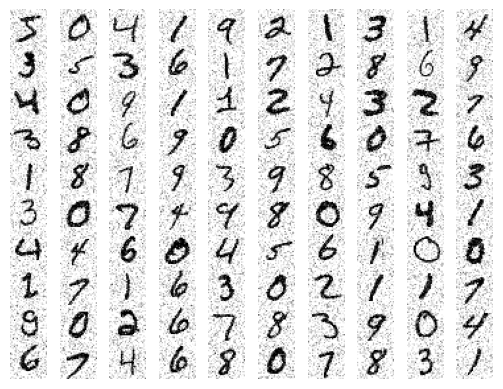

In [19]:
def add_gaussian_noise(images, mean=0.0, std=50.0):
    """Add Gaussian noise to images and clip to valid range."""
    noise = np.random.normal(loc=mean, scale=std, size=images.shape)
    return np.clip(images + noise, 0, 255).astype(np.uint8)

X_train_noisy = add_gaussian_noise(X_train)

print_matrix_first_100(X_train_noisy)

12. Binarización
    - Crea una función `binarize_image` que binarice una imagen (convirtiendo los píxeles a 0 o 1). La función debe recibir un array de NumPy con una imagen y un valor de corte `threshold` a partir del cual se considera que un píxel es 1.
    - Crea un nuevo array `X_train_binarized` poniendo a 0 todos los píxeles que sean menores de 128 y a 1 todos los píxeles que sean mayores o iguales que 128. Prueba otros valores de corte.

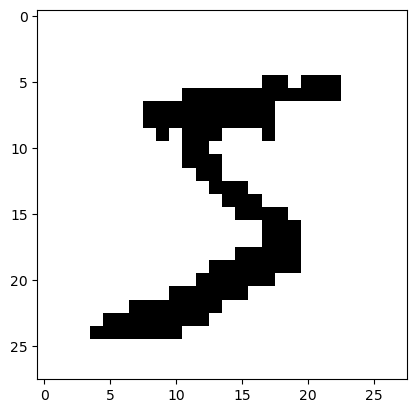

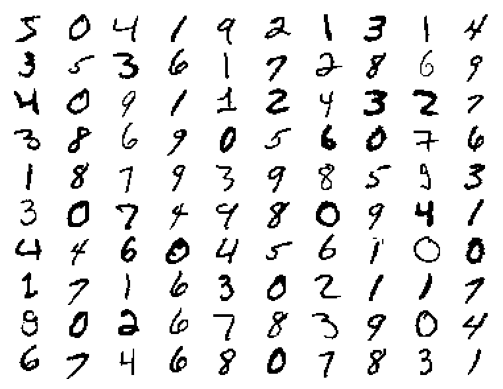

In [20]:
def binarize_image(image: np.ndarray, threshold: int = 128) -> np.ndarray:
    return (image > threshold).astype(np.uint8)

X_train_binarized = binarize_image(X_train)

plot_image(X_train_binarized[0])
print_matrix_first_100(X_train_binarized)

13. Aplica el proceso de binarización a las imágenes con ruido creando un nuevo array `X_train_noisy_binarized`. Prueba distintos valores de `threshold` para ver cómo afecta a la imagen.

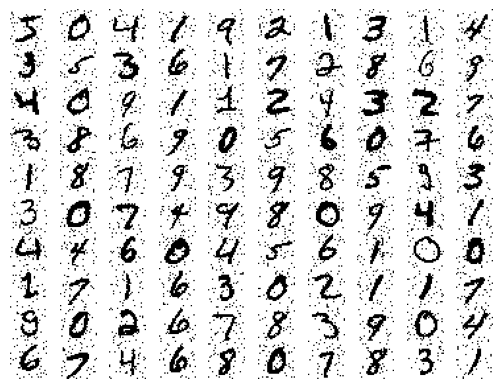

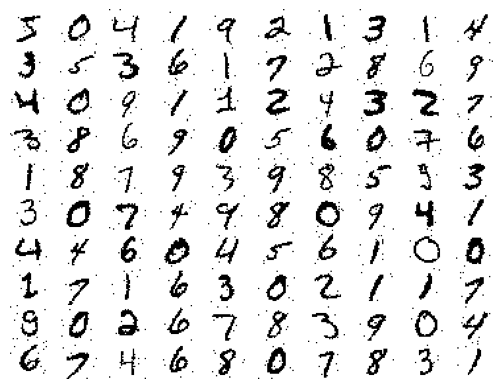

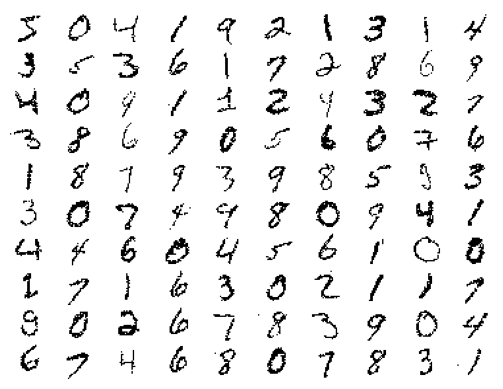

In [21]:
threshold_values = [80, 120, 180]

for threshold in threshold_values:
    X_train_noisy_binarized = binarize_image(X_train_noisy, threshold)
    print_matrix_first_100(X_train_noisy_binarized)

14. Crea una función `shift_image` que desplace una imagen en una dirección (arriba, abajo, izquierda, derecha) un número de píxeles dado. La función debe recibir un array de NumPy con una imagen, un valor de desplazamiento vertical `dy` y un valor de desplazamiento horizontal `dx`. Los valores positivos desplazarán hacia abajo y hacia la derecha, y los valores negativos hacia arriba y hacia la izquierda. Si la imagen se sale de los límites, la imagen quedará cortada en esa parte. Los pixeles que se añadan se rellenarán con 0.

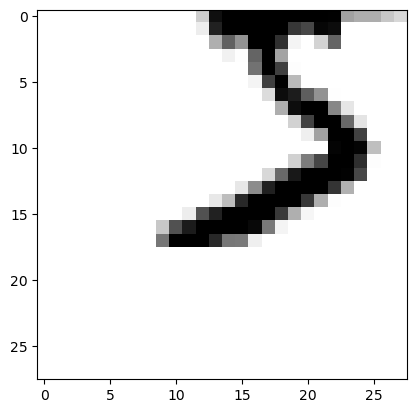

In [22]:
def shift_image_1(image: np.ndarray, dx: int, dy: int) -> np.ndarray:
    """
    Shifts an image by the specified number of pixels.
    
    Args:
        image: Input image (28x28 numpy array)
        dx: Horizontal shift (positive = right, negative = left)
        dy: Vertical shift (positive = down, negative = up)
    
    Returns:
        Shifted image with same shape as input, padded with zeros
    """
    # Create an empty image of same size
    result = np.zeros_like(image)
    
    # Calculate source and destination ranges
    if dx >= 0:  # Moving right
        src_x1, src_x2 = 0, 28 - dx
        dst_x1, dst_x2 = dx, 28
    else:  # Moving left
        src_x1, src_x2 = -dx, 28
        dst_x1, dst_x2 = 0, 28 + dx
        
    if dy >= 0:  # Moving down
        src_y1, src_y2 = 0, 28 - dy
        dst_y1, dst_y2 = dy, 28
    else:  # Moving up
        src_y1, src_y2 = -dy, 28
        dst_y1, dst_y2 = 0, 28 + dy
    
    # Copy the visible portion of the image to its new position
    result[dst_y1:dst_y2, dst_x1:dst_x2] = image[src_y1:src_y2, src_x1:src_x2]
    
    return result


def shift_image(image: np.ndarray, dx: int, dy: int) -> np.ndarray:
    height, width = image.shape
    
    shifted_image = np.zeros_like(image)
    
    dest_y_start = max(0, dy)
    dest_y_end = min(height, height + dy)
    dest_x_start = max(0, dx)
    dest_x_end = min(width, width + dx)
    
    src_y_start = max(0, -dy)
    src_y_end = min(height, height - dy)
    src_x_start = max(0, -dx)
    src_x_end = min(width, width - dx)
    
    shifted_image[dest_y_start:dest_y_end, dest_x_start:dest_x_end] = \
        image[src_y_start:src_y_end, src_x_start:src_x_end]
    
    return shifted_image

# Test equivalence
image = X_train[0]  # Get a test image
dx, dy = 5, -7      # Test with some shift values

result1 = shift_image(image, dx, dy)
result = shift_image(image, dx, dy)

assert np.array_equal(result, result1)

plot_image(shift_image(X_train[0], 5, -7))

15. Crea un array `X_train_shifted_right_10` que contenga las imágenes de `X_train` desplazadas 10 píxeles a la derecha. Muestra las primeras 100 imágenes de este nuevo array para comprobar como al desplazar las imágenes se pierden píxeles.

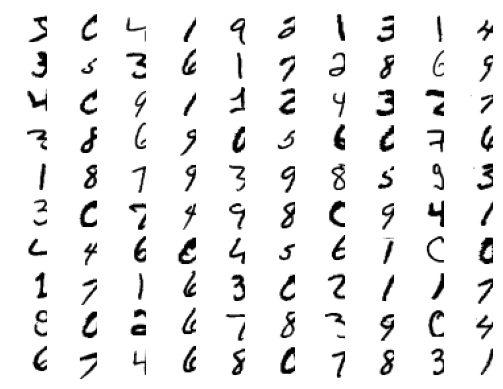

In [23]:
X_train_shifted_right_10 = np.array([shift_image(image, 10, 0) for image in X_train])
print_matrix_first_100(X_train_shifted_right_10)

16. Crea una función `find_limits` que reciba una imagen y devuelva los límites donde la imagen deja de ser todo 0s. Debe devolver una tupla con los valores `(top, bottom, left, right)` que serán las coordenadas de la región de la imagen donde hay píxeles diferentes de 0.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def find_limits1(image):
    non_zero_pixels = np.where(image != 0) # devuelve los índices de los valores no nulos
    
    top = np.min(non_zero_pixels[0])
    bottom = np.max(non_zero_pixels[0])
    left = np.min(non_zero_pixels[1])
    right = np.max(non_zero_pixels[1])
    
    return (top, bottom, left, right)


def find_limits2(image):
    
    # Find rows and columns containing non-zero values
    rows_non_zero = np.any(image, axis=1) # más eficiente que usar np.where directamente
    cols_non_zero = np.any(image, axis=0)
    
    # Get the boundary indices
    top, bottom = np.where(rows_non_zero)[0][[0,-1]]
    # [0] para obtener el array de índices a True, [0,-1] para obtener el primer y último elemento
    left, right = np.where(cols_non_zero)[0][[0,-1]]
    
    return top, bottom, left, right


def find_limits(image: np.ndarray) -> tuple:
    """
    Finds the boundaries where the image stops being all zeros.
    
    Args:
        image: numpy array of shape (28, 28)
        
    Returns:
        tuple (top, bottom, left, right) with the indices of the boundaries
        where the digit content begins/ends
    """
    top, bottom = np.where(np.any(image, axis=1))[0][[0, -1]]
    left, right = np.where(np.any(image, axis=0))[0][[0, -1]]
    return top, bottom, left, right

assert find_limits(X_train[0]) == find_limits2(X_train[0]) == find_limits(X_train[0])

top, bottom, left, right = find_limits(X_train[0])
print(find_limits(X_train[0]))

print(X_train[0, top-1, :]) # última fila de ceros
print(X_train[0, top, :]) # primera fila con contenido


(5, 24, 4, 23)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


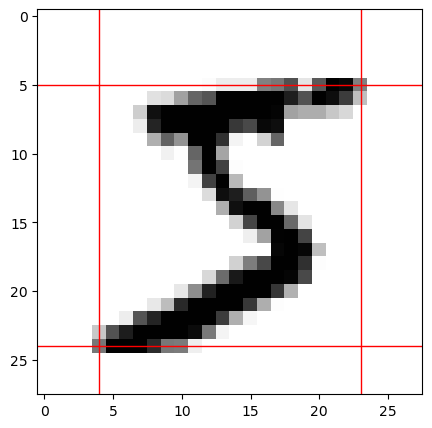

In [25]:
# Para visualizar los límites

def draw_boundaries(image, boundaries=None):
    """
    Draws an MNIST image with its boundaries marked in red.
    
    Args:
        image: numpy array of shape (28, 28)
        boundaries: tuple (top, bottom, left, right) optional. If not provided,
                   it will be calculated using find_limits
    """
    if boundaries is None:
        boundaries = find_limits(image)
    
    top, bottom, left, right = boundaries
    
    # Display the original grayscale image
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='binary')
    
    # Add red lines for boundaries
    plt.axhline(y=top, color='r', linestyle='-', linewidth=1)
    plt.axhline(y=bottom, color='r', linestyle='-', linewidth=1)
    plt.axvline(x=left, color='r', linestyle='-', linewidth=1)
    plt.axvline(x=right, color='r', linestyle='-', linewidth=1)
    plt.show()

    
draw_boundaries(X_train[0])

TODO: No hay ejercicio 17

18. Crea una función `crop_image_limits` que reciba una imagen y la devuelva recortada a los límites calculados con la función `find_limits`. Prueba esta función con la primera imagen de `X_train`.

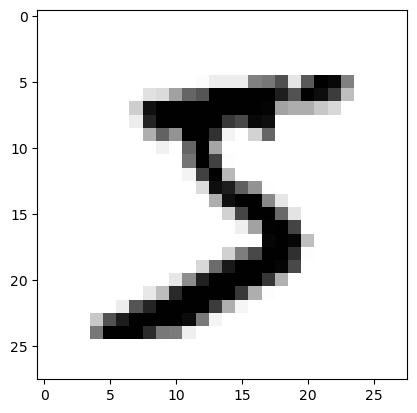

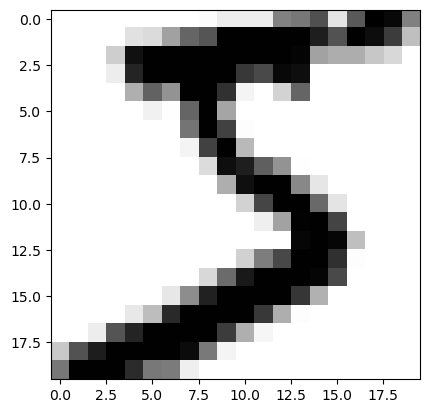

(20, 20)


In [26]:
def crop_image_limits(image):
    top, bottom, left, right = find_limits(image)
    return image[top:bottom+1, left:right+1]

plot_image(X_train[0])
plot_image(crop_image_limits(X_train[0]))
print(crop_image_limits(X_train[0]).shape)

19. Crea un array `X_train_shifted` que contenga las imágenes desplazando cada una en una dirección aleatoria un número de píxeles aleatorio pero garantizando que la imagen no se salga de los límites de la imagen original. Muestra las primeras 100 imágenes de este nuevo array.

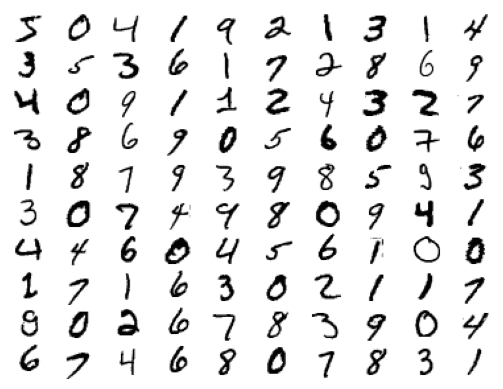

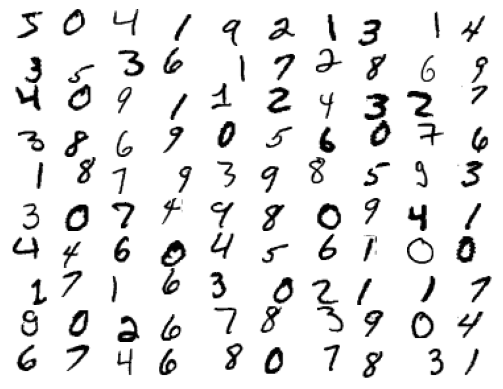

In [27]:
def random_shift(image):
    height, width = image.shape

    top, bottom, left, right = find_limits(image)

    max_up = top
    max_down = height - bottom - 1
    max_left = left
    max_right = width - right - 1

    dy = np.random.randint(-max_up, max_down + 1)
    dx = np.random.randint(-max_left, max_right + 1)
    
    return shift_image(image, dx=dx, dy=dy)
# Interesante ejemplo de cómo los keywords arguments pueden ser útiles: perdí tiempo depurando un error porque en esta última línea pasaba (image, dy, dx) y veía que algunas imágenes se cortaban.


def random_shift_dataset(X):
    shifted_X = np.zeros_like(X)
    for i in range(len(X)):
        shifted_X[i] = random_shift(X[i])
    return shifted_X

X_train_shifted = random_shift_dataset(X_train)
print_matrix_first_100(X_train)
print_matrix_first_100(X_train_shifted)

20. Vamos a crear un conjunto de entrenamiento aumentado `X_train_augmented` añadiendo las siguientes transformaciones a las imágenes de entrenamiento:
    - Imágenes con ruido
    - Imágenes binarizadas
    - Imágenes con ruido binarizadas
    - Imágenes desplazadas aleatoriamente

In [30]:
X_train_augmented = np.concatenate(
    (X_train, X_train_noisy, X_train_binarized, X_train_noisy_binarized, X_train_shifted), axis=0)

assert X_train_augmented.shape[0] == 5 * X_train.shape[0]